# 基于Sklearn库的手写数字识别实例

## 从sklearn数据库中导入数据集

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()

print(digits.images.shape)

(1797, 8, 8)


## 可视化数据集中的一些图片

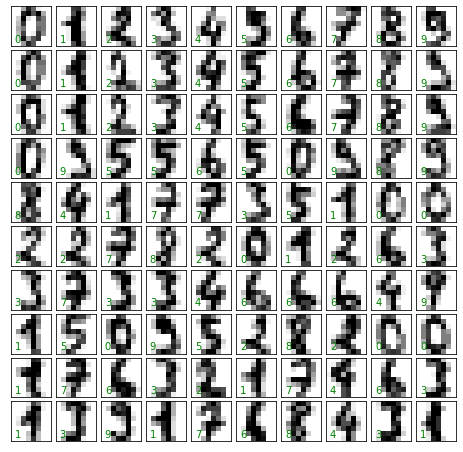

In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10,10, figsize=(8, 8),subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.1, 0.1, str(digits.target[i]),transform=ax.transAxes, color='green')
    
plt.show()

## 降维查看数据分布

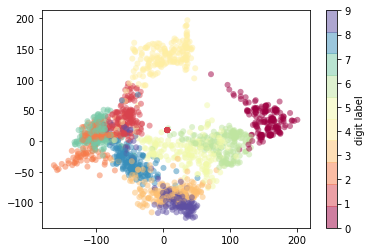

In [4]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(0, 9)
plt.show()

## 划分数据集

In [4]:
X = digits.data
y = digits.target

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test  = train_test_split(X,y,test_size=0.4, random_state=7)


## KNN分类器——分类和打印报告

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print('Score:',model.score(X_test,y_test))

from sklearn.metrics import classification_report
target_names = ['0', '1', '2','3','4','5','6','7','8','9']
print(classification_report(y_test, y_predict, target_names=target_names))


Score: 0.9791376912378303
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       0.92      1.00      0.96        73
           2       1.00      1.00      1.00        73
           3       0.93      0.99      0.96        72
           4       1.00      0.99      0.99        74
           5       0.97      1.00      0.98        60
           6       1.00      0.99      0.99        70
           7       0.99      1.00      0.99        70
           8       0.99      0.92      0.95        84
           9       1.00      0.93      0.96        72

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719



## 贝叶斯分类器——修改不同的分类器并比较

https://scikit-learn.org/stable/modules/naive_bayes.html


In [5]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(X_train,y_train)

from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()
model2.fit(X_train,y_train)

from sklearn.naive_bayes import ComplementNB
model3 = ComplementNB()
model3.fit(X_train,y_train)

from sklearn.naive_bayes import BernoulliNB
model4 = BernoulliNB()
model4.fit(X_train,y_train)

print('Gaussian Naive Bayesian Score:',model1.score(X_test,y_test))
print('Multinomial Naive Bayesian Score:',model2.score(X_test,y_test))
print('Complement Naive Bayesian Score:',model3.score(X_test,y_test))
print('Bernoulli Naive Bayesian Score:',model4.score(X_test,y_test))

Gaussian Naive Bayesian Score: 0.8066759388038943
Multinomial Naive Bayesian Score: 0.8929068150208623
Complement Naive Bayesian Score: 0.7830319888734353
Bernoulli Naive Bayesian Score: 0.8511821974965229


## 树与随机森林分类器——参数的影响

In [6]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print('Score:',model.score(X_test,y_test))

Score: 0.8428372739916551


In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print('Score:',model.score(X_test,y_test))

Score: 0.9582753824756607


## svc分类器——混淆矩阵
具体参数：

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
C float, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’

In [20]:
from sklearn import svm
model = svm.SVC(C=10.0, kernel='linear')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print('Score:',model.score(X_test,y_test))

Score: 0.9707927677329624


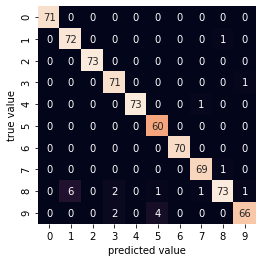

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')                        
plt.show()

## 交叉验证
以十折交叉验证为例

In [25]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model, X, y, cv=10, scoring="accuracy"))

[0.93888889 0.99444444 0.93333333 0.94444444 0.96111111 0.98888889
 0.96666667 0.97765363 0.93296089 0.96648045]
